# Домашняя работа п.1.6 ключевые слова и биграммы

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('data.csv', usecols = ['text', 'rating_grade'])
df = df.loc[df['rating_grade'].isin([1,5])]
df.head()

,text,rating_grade
19,открыт вклад и счет в плюс к этому есть зарпла...,1.0
33,доброго времени вчера мне поступило смс уведом...,1.0
76,г около часов пришел в указанный офис с намере...,1.0
85,для оплаты коммунальных платежей пользуюсь пла...,1.0
94,в апреле этого года пришла в отделение сбербан...,1.0


In [6]:
df['rating_grade'].value_counts()

1.0    47387
5.0    14713
Name: rating_grade, dtype: int64

### Предобработка

#### Оставляем только слова:

In [29]:
import re
regex = re.compile("[А-Яа-я]+")
# датасет сократил для уменьшения времени лемматизации до приемлемого
sample = df[df['rating_grade'] == 1].head(100)

In [30]:
def words_only(text, regex=regex):
    return " ".join(regex.findall(str(text)))


sample.text = sample.text.str.lower()
sample.text = sample.text.apply(words_only)

In [31]:
sample.text.iloc[0]

'открыт вклад и счет в плюс к этому есть зарплатная карта в рублях само собой сегодня пришел в указанное отделение с целью пополнить долларовый сч т на дал операционисту паспорт зарплатную карту т к на окошке написано приготовьте карту для подтверждения операции или что то подобное и в прошлый раз у меня ее потребовали и сказал что нужно положить деньги на долларовый счет операционист вс взяла что то делала крутила вертела вставила карту в терминал сказала введите пин я вв л пин получил в ответ чек где было написано что доллары были внесены на сч т карты в рублях вопрос банку риторический я не понимаю кем нужно быть чтобы сознательно проводить такие операции за углом меньше чем через квартал курс при ма валюты выше почти на рубль если я действительно хотел совершить такую хитрую операцию мне было выгоднее сделать шагов и заработать на этом около рублей после чего просто внести рубли на сч т карты в банкомате далее после долгих около двух часов выяснений отношений с операционистом и вид

#### Убираем стоп-слова:

In [32]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']

print(mystopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [33]:
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
sample.text = sample.text.apply(remove_stopwords)   

In [34]:
sample.text.iloc[0][:100]

'открыт вклад счет плюс этому зарплатная карта рублях само собой сегодня пришел указанное отделение ц'

#### Лемматизируем

In [25]:
from pymystem3 import Mystem
m = Mystem()

In [26]:
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [35]:
%%time
sample.text = sample.text.apply(lemmatize)

Wall time: 1min 21s


In [36]:
sample.text.iloc[0][:100]

'открывать вклад счет плюс этот зарплатный карта рубль сам себя сегодня приходить указанный отделение'

#### Удаление стоп-лемм

In [37]:
mystoplemmas = ['который', 'прошлый', 'сей', 'свой', 'наш', 'мочь', 'год']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

sample.text = sample.text.apply(remove_stoplemmas)   

### Частотный словарь и облако слов

In [40]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [41]:
lemmata = [lemma for text in sample.text for lemma in text.split()]

In [42]:
cnt = Counter(lemmata)

In [43]:
for i in cnt.most_common(10):
    print(i)

('банк', 442)
('карта', 275)
('отделение', 154)
('сотрудник', 135)
('деньги', 127)
('мой', 116)
('день', 114)
('клиент', 97)
('заявление', 90)
('вклад', 85)


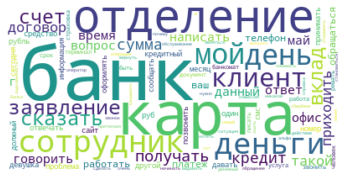

In [44]:
word_freq = [i for i in cnt.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Извлечение ключевых словосочетаний 


Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* по частотам VS посложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

### Основные этапы извлечения ключевых слов и словосочетаний:
1. Порождение кандидатов
2. Оценка свойст кандидатов
3. Выбор лучших кандидатов

### Основные методы извлечения ключевых слов и словосочетаний:
* Морфологические шаблоны
* Меры ассоциации биграмм: PMI, T-Score, LLR
* Графовые методы: TextRank [Mihalcea, Tarau, 2004]
* Синтаксические шаблоны


### Морфологические шаблоны

Можно использовать парсер  Yargy. 

Простейший шаблон ПРИЛ + СУЩ

```
S -> Adj<gnc-agr[1]> Noun<rt,gnc-agr[1]>; 
```

### Использование мер связности 


$w_1, w_2$ − два слова

$f(w_1), f(w_2)$ − их частоты

$f(w_1, w_2)$ − совместная частота биграммы $w_1 w_2$

$N$ − число слов

$PMI(w_1, w_2) = \log \frac{f(w_1, w_2)}{f(w_1)f(w_2)}$

$T-score(w_1, w_2) = \frac{f(w_1,w_2)-f(w_1)*f(w_2)}{f(w_1,w_2)/N}$

Другие меры связности: $\chi^2$

![chi-square](chi-square-formula.jpg)

### На практике

Получаем из датафрейма списки по разных топиков:

In [47]:
def get_topic_to_tokens(df):
    tokens_by_rating = {}
    for rating in set(df['rating_grade']):
        # берём по сто случайных текстов из каждой темы
        sample = df[df['rating_grade']==rating].sample(n=100)
            
        # предобрабатываем
        sample.text = sample.text.str.lower()
        sample.text = sample.text.apply(words_only)
        sample.text = sample.text.apply(remove_stopwords) 
        sample.text = sample.text.apply(lemmatize)
        sample.text = sample.text.apply(remove_stoplemmas) 

        tokens_by_rating[rating] = [tok for text in sample.text for tok in text.split()]
            
    return tokens_by_rating

In [48]:
tokens_by_rating = get_topic_to_tokens(df)

In [50]:
tokens_by_rating.keys()

dict_keys([1.0, 5.0])

Выберем тему, из текстов про которую будем извлекать ключевые слова:

In [51]:
topic_texts = tokens_by_rating[1]

In [52]:
topic_texts[:10]

['декабрь',
 'нужно',
 'срочно',
 'полагать',
 'деньги',
 'яндекс',
 'кошелек',
 'рука',
 'оказываться',
 'терминал']

Извлекаем биграммы по разным мерам связности:

In [53]:
import nltk
from nltk.collocations import *

In [54]:
bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(topic_texts) # класс для хранения и извлечения биграм

In [55]:
N_best = 100 # число извлекаемых биграм

In [56]:
%%time 
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз

# выбираем топ-100 биграм по каждой мере
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)]
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)]
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

Wall time: 8.58 ms


Результаты:

In [57]:
rankings = pd.DataFrame({
    'chi2': chi2_ranking,
    't-score' : tscore_ranking,
    'pmi': pmi_ranking,
    'raw_freq':raw_freq_ranking
})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2
0,кредитный карта,моральный вред,кредитный карта,санкт петербург
1,написать заявление,больничный лист,написать заявление,великий новгород
2,кредитный история,московский область,кредитный история,пин код
3,пин код,страховой компания,пин код,моральный вред
4,рабочий день,бла бла,рабочий день,страховой компания
5,сотрудник банк,пош л,денежный средство,колл центр
6,денежный средство,приш л,колл центр,процентный ставка
7,колл центр,пятьдесят тысяча,приходить смс,оао отп
8,позвонить банк,входить положение,сотрудник банк,денежный средство
9,приходить смс,процентный ставка,следующий день,пош л


In [60]:
# повторим с пятерками

topic_texts = tokens_by_rating[5]
finder = BigramCollocationFinder.from_words(topic_texts)

finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз

# выбираем топ-100 биграм по каждой мере
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)]
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)]
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

rankings = pd.DataFrame({
    'chi2': chi2_ranking,
    't-score' : tscore_ranking,
    'pmi': pmi_ranking,
    'raw_freq':raw_freq_ranking
})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2
0,следующий день,алина юрьевна,следующий день,алина юрьевна
1,клиент банк,горячий линия,ипотечный кредит,горячий линия
2,ипотечный кредит,тарифный план,кредитный карта,первоначальный взнос
3,кредитный карта,обращать внимание,рабочий день,тарифный план
4,отделение банк,цик мясницкий,клиент банк,купля продажа
5,рабочий день,треть купюра,отделение банк,обращать внимание
6,интернет банк,наталья александровна,какой либо,цик мясницкий
7,какой либо,право собственность,положительный решение,треть купюра
8,добрый день,купля продажа,отношение клиент,право собственность
9,открывать вклад,первоначальный взнос,добрый день,з п
